# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [1]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [2]:
df_obesity = pd.read_csv("obesity_cleaned.csv")

In [3]:
df_obesity

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...,...
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


In [4]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   24570 non-null  int64 
 1   Country      24570 non-null  object
 2   Year         24570 non-null  int64 
 3   Obesity (%)  24570 non-null  object
 4   Sex          24570 non-null  object
dtypes: int64(2), object(3)
memory usage: 959.9+ KB


- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [5]:
del df_obesity['Unnamed: 0']

In [6]:
df_obesity['Obesity'] = df_obesity['Obesity (%)'].apply(lambda x: x.split(' ')[0])

In [7]:
df_obesity['Obesity'] = pd.to_numeric(df_obesity['Obesity'], errors='coerce')

In [8]:
df_obesity

,Country,Year,Obesity (%),Sex,Obesity
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes,0.5
1,Afghanistan,1975,0.2 [0.0-0.6],Male,0.2
2,Afghanistan,1975,0.8 [0.2-2.0],Female,0.8
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes,0.5
4,Afghanistan,1976,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male,4.5
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female,24.8
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes,15.5
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male,4.7


In [9]:
df_obesity.info() ## Após mudanças

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      24570 non-null  object 
 1   Year         24570 non-null  int64  
 2   Obesity (%)  24570 non-null  object 
 3   Sex          24570 non-null  object 
 4   Obesity      24066 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 959.9+ KB


- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [10]:
df_obesity[df_obesity['Year'] == 2015].groupby('Sex')['Obesity'].mean()

Sex
Both sexes    19.508377
Female        22.899476
Male          15.980628
Name: Obesity, dtype: float64

- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [11]:
df_obesity_min = df_obesity[df_obesity['Year'] == 1975]
df_obesity_max = df_obesity[df_obesity['Year'] == 2016]

In [12]:
df_obesity_min.set_index('Country', inplace=True)
df_obesity_max.set_index('Country', inplace=True)

In [13]:
df_obesity_variance = df_obesity_max['Obesity'] - df_obesity_min['Obesity']

In [14]:
df_obesity_variance = df_obesity_variance.groupby('Country').mean()

In [15]:
df_obesity_variance.sort_values().dropna().head(5)

Country
Viet Nam       1.966667
Singapore      3.066667
Japan          3.266667
Bangladesh     3.400000
Timor-Leste    3.533333
Name: Obesity, dtype: float64

In [16]:
df_obesity_variance.sort_values().dropna().tail(5)

Country
Cook Islands    27.866667
Tonga           28.100000
Kiribati        30.000000
Niue            31.000000
Tuvalu          33.666667
Name: Obesity, dtype: float64

- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [17]:
df_brasil = df_obesity[df_obesity['Country'] == 'Brazil']

In [18]:
df_brasil.set_index('Year', inplace=True)

In [19]:
df_brasil

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Brazil,5.2 [3.3-7.9],Both sexes,5.2
1975,Brazil,3.0 [1.4-5.7],Male,3.0
1975,Brazil,7.3 [4.0-12.0],Female,7.3
1976,Brazil,5.5 [3.5-8.1],Both sexes,5.5
1976,Brazil,3.2 [1.5-5.8],Male,3.2
...,...,...,...,...
2015,Brazil,18.0 [13.9-22.6],Male,18.0
2015,Brazil,24.9 [20.3-29.8],Female,24.9
2016,Brazil,22.1 [18.7-25.7],Both sexes,22.1


In [20]:
(df_brasil[df_brasil['Sex'] == 'Female']['Obesity']) - (df_brasil[df_brasil['Sex'] == 'Male']['Obesity'])

Year
1975    4.3
1976    4.4
1977    4.6
1978    4.7
1979    4.9
1980    4.9
1981    5.1
1982    5.2
1983    5.4
1984    5.5
1985    5.6
1986    5.7
1987    5.8
1988    5.9
1989    6.0
1990    6.1
1991    6.1
1992    6.3
1993    6.3
1994    6.4
1995    6.4
1996    6.5
1997    6.6
1998    6.7
1999    6.8
2000    6.8
2001    6.8
2002    6.8
2003    6.9
2004    6.9
2005    6.9
2006    6.9
2007    7.0
2008    6.9
2009    7.0
2010    7.0
2011    6.9
2012    6.9
2013    6.9
2014    6.9
2015    6.9
2016    6.9
Name: Obesity, dtype: float64

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

<Axes: xlabel='Year'>

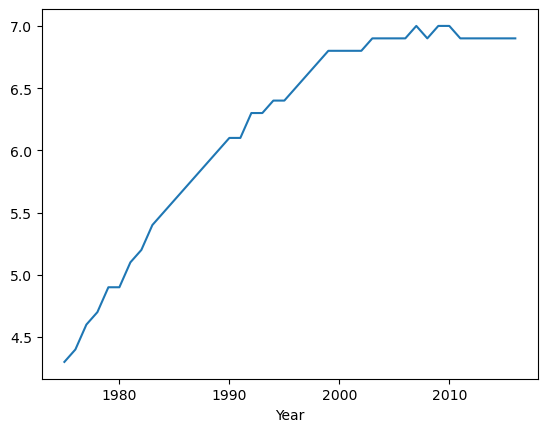

In [21]:
(df_brasil[df_brasil['Sex'] == 'Female']['Obesity'] - df_brasil[df_brasil['Sex'] == 'Male']['Obesity']).plot()

## Perguntas - GDP Per Person (1901-2011)

In [22]:
df_gdp = pd.read_csv("GDP.csv", decimal=".")

- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [23]:
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


In [24]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   4419 non-null   object
 1   Region    4419 non-null   object
 2   Year      4419 non-null   object
 3    GDP_pp   4419 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB


In [25]:
df_gdp.columns

Index(['Country', 'Region', 'Year', ' GDP_pp '], dtype='object')

In [26]:
df_gdp['GDP_pp'] = df_gdp[' GDP_pp '].str.replace(",", "")

In [27]:
del df_gdp[' GDP_pp ']

In [28]:
df_gdp['GDP_pp'] = pd.to_numeric(df_gdp['GDP_pp'])

In [29]:
df_gdp['Year'] = pd.to_datetime(df_gdp['Year']).dt.year

In [30]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  4419 non-null   object 
 1   Region   4419 non-null   object 
 2   Year     4419 non-null   int32  
 3   GDP_pp   4419 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 121.0+ KB


In [31]:
df_gdp.head()

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40


- Você conseguiria informar o primeiro valor registrado de cada país?

In [32]:
df_gdp[df_gdp['Year'] == 1901]

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
23,Albania,Europe,1901,1062.01
46,Algeria,"Middle East, North Africa, and Greater Arabia",1901,1807.76
69,Andorra,Europe,1901,3352.50
92,Angola,Sub-Saharan Africa,1901,525.76
...,...,...,...,...
4304,Venezuela,South America,1901,766.21
4327,Vietnam,Asia,1901,572.96
4350,"Yemen, Rep.","Middle East, North Africa, and Greater Arabia",1901,729.39
4373,Zambia,Sub-Saharan Africa,1901,532.38


- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [33]:
df_gdp_start = df_gdp[df_gdp['Year'] == 1901]
df_gdp_end = df_gdp[df_gdp['Year'] == 1996]

In [34]:
df_gdp_start.set_index('Region', inplace=True)
df_gdp_end.set_index('Region', inplace=True)

In [35]:
((df_gdp_end.groupby('Region')['GDP_pp'].mean() / df_gdp_start.groupby('Region')['GDP_pp'].mean()-1)*100).sort_values(ascending=False).head()

Region
Middle East, North Africa, and Greater Arabia    857.215950
Asia                                             711.761516
Europe                                           594.046167
North America                                    589.760175
Central America and the Caribbean                406.426789
Name: GDP_pp, dtype: float64

In [36]:
((df_gdp_end.groupby('Region')['GDP_pp'].mean() / df_gdp_start.groupby('Region')['GDP_pp'].mean()-1)*100).sort_values(ascending=True).head()

Region
Sub-Saharan Africa                   248.633780
South America                        312.123735
Australia and Oceania                396.075383
Central America and the Caribbean    406.426789
North America                        589.760175
Name: GDP_pp, dtype: float64

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [57]:
arr_year = np.arange(df_gdp['Year'].min(),df_gdp['Year'].max())
df_all_years = pd.DataFrame(arr_year, columns=['Year'])
df_all_years.index = df_all_years['Year']

df_years_off = ~df_all_years['Year'].isin(df_gdp['Year'])
df_years_off = df_all_years.loc[df_years_off].index

In [58]:
df_years_off

Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914, 1915,
       1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928, 1929, 1930,
       1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942, 1943, 1944, 1945,
       1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1957, 1958, 1959, 1960,
       1962, 1963, 1964, 1965, 1967, 1968, 1969, 1970, 1972, 1973, 1974, 1975,
       1977, 1978, 1979, 1980, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990,
       1992, 1993, 1994, 1995, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005,
       2007, 2008, 2009, 2010],
      dtype='int32', name='Year')

In [73]:
df_gdp = df_gdp.sort_values(['Country','Year'])
df_gdp['delta_gdp'] = df_gdp['GDP_pp'] - df_gdp['GDP_pp'].shift(1)
df_gdp['delta_year'] = df_gdp['Year'] - df_gdp['Year'].shift(1)
df_gdp['gdp_year'] = (df_gdp['delta_gdp']/df_gdp['delta_year']).shift(-1)
df_gdp['gdp_next_year'] = (df_gdp['Year']).shift(-1)

del df_gdp['delta_year'],df_gdp['delta_gdp']

In [74]:
df_gdp.head(5)

,Country,Region,Year,GDP_pp,gdp_year,gdp_next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,3.094,1926.0


In [90]:
df_new_data = pd.DataFrame()

for idx, row in df_gdp.iterrows():
    if row['Year'] == 2011:
        continue
    
    years_to_add = df_years_off[(df_years_off < row['gdp_next_year']) & (df_years_off > row['Year'])]
    
    for new_year in years_to_add:
        add_row = row.copy()
        add_row['GDP_pp'] = (new_year - add_row['Year']) * add_row['gdp_year'] + add_row['GDP_pp']
        add_row['Year'] = new_year
        add_row['Kind'] = 'Estimated'
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])

In [92]:
df_new_data.head(5)

,Country,Region,Year,GDP_pp,gdp_year,gdp_next_year,Kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,Estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,Estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,Estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,Estimated
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1907,626.082,2.042,1911.0,Estimated


In [93]:
df_gdp = pd.concat([df_gdp,df_new_data])

In [96]:
df_gdp.sort_values(['Country','Year'], inplace=True)

In [98]:
df_gdp.index = df_gdp['Year']

In [101]:
df_gdp['Kind'].fillna('Real', inplace=True)

In [107]:
df_gdp

,Country,Region,Year,GDP_pp,gdp_year,gdp_next_year,Kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,Real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,Estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,Estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,Estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,Estimated
...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,Estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,Estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,Estimated


<Axes: xlabel='Year', ylabel='GDP_pp'>

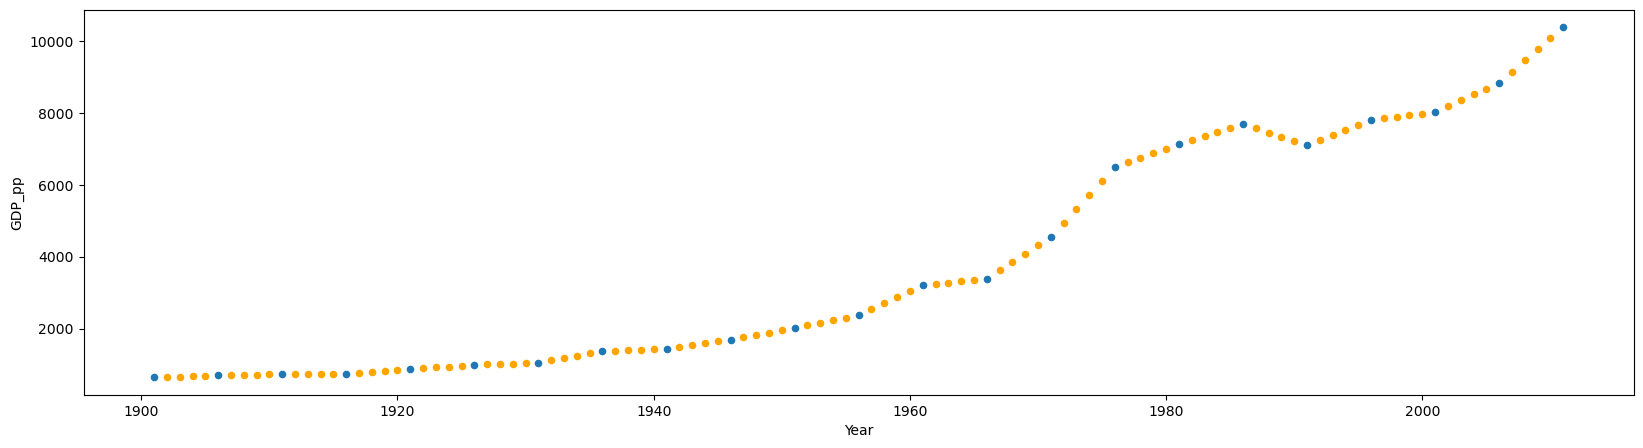

In [115]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,5))

country = 'Brazil'
df_gdp[(df_gdp['Kind']=='Real') & (df_gdp['Country']==country)].plot(kind='scatter', y='GDP_pp', x='Year', ax=ax)
df_gdp[(df_gdp['Kind']=='Estimated') & (df_gdp['Country']==country)].plot(kind='scatter', y='GDP_pp', x='Year', ax=ax, color='orange')

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

- Há uma relação entre níveis de obesidade e gdp per capita?